---

# Análise Exploratória de Dados com Python: Eleições de 2022

---

# **Tópicos**

<ol type="1">
  <li>Introdução;</li>
  <li>Exploração;</li>
  <li>Processamento;</li>
  <li>Visualização;</li>
  <li>Referências.</li>
</ol>

---

## 1\. Introdução

Entendendo contexto de negócio que estamos inseridos utilizando VSCode

### **1.1. Contexto** 

O tribunal superior eleitoral (TSE) disponibilizou os dados brutos das urnas de votação utilizadas durante o processo eleitoral de 2022. No site do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html#/eleicao/resultados)) encontra-se os seguintes dados para cada urna:

 - **Registro Digital do Voto (RDV)**: Registro unitário dos votos;
 - **Boletim de Urna**: Resultados agregados;
 - **Log de Urna**: Todos os eventos que ocorreram na urna.

A documentação técnica para o processamento dos arquivo também se encontra no website do TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)).

> Para uma única urna (estado, cidade, zona e seção), vamos utilizar o **Python** para processar o seu arquivo **RDV** e replicar os valores agregados do seu **Boletim de Urna** para o segundo turno de votação para presidente do processo eleitoral de 2022.

### **1.2. Visual Studio Code (VSCode)**

> Ambiente de desenvolvimento integrado - IDE (*notebooks*).



Ele é amplamente utilizado para programação em várias linguagens, incluindo Python. Uma das características notáveis do VSCode é a sua extensibilidade, que permite adicionar funcionalidades adicionais por meio de extensões.






 VSCode com a extensão Jupyter oferece uma experiência integrada para explorar dados por meio de Notebooks Jupyter, proporcionando um ambiente eficiente e flexível para análise e visualização de dados.



**Cadernos (*notebooks*)** 

Um **caderno** é um documento composto por um conjunto de elementos (células) de texto e código:


*   Células de **texto** podem ser editados com o editor da ferramenta, HTML ou Markdown; 
*   Células de **código** são exclusivamente para a linguagem de programação Python.



In [1]:
print("olá, mundo!")

olá, mundo!


## 2\. Exploração

Explorar, limpar e extrair os votos do arquivo RDV.

### **2.1. Upload** 

No site de resultados do TSE ([link](https://resultados.tse.jus.br/oficial/app/index.html)), selecione os dados de uma única urna, faça o *download* do arquivo RDV.

### **2.2. Descriptografia** 

Vamos utilizar o código disponibilizado pelo próprio TSE ([link](https://www.tse.jus.br/eleicoes/eleicoes-2022/documentacao-tecnica-do-software-da-urna-eletronica)) para descriptografar o arquivo RDV em um arquivo de texto. O código foi replicado neste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py).

 - Faça o *download* do código de descriptografia.

In [2]:
!curl -s https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/notebooks/2022_11_29/rdv.py -o rdv.py

 - Instale o pacote de criptografia utilizado pelo código.

In [3]:
%pip install asn1crypto==1.5.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


 - Substitua o texto `<NOME-DO-ARQUIVO-RDV>` pelo nome do arquivo RDV escolhido.

In [4]:
# execução do código abaixo diretamente no terminal do sistema operacional
# python rdv.py -r o00407-7107204050035.rdv.rdv > rdv.txt

### **2.3. Limpeza** 

Na etapa de limpeza, vamos selecionar apenas as linhas do arquivo RDV referentes a votação para presidente.

In [5]:
# criando uma lista vazia
content = []

# leitura dos dados utilizando 'for' executando linha a linha para pegar votos para presidente
with open(file="rdv.txt", mode="r") as fp:
  for line in fp.readlines():
    if "Governador" in line:
      break
    else:
      content.append(line) 

In [6]:
# verificando o número de elementos na lista 
len(content)

267

In [7]:
# imprimindo as 10 primeiras linhas
for line in content[0:10]:
  print(line)


----------------------------------------

Presidente

  1 - nominal  - [13]

  2 - nominal  - [13]

  3 - nominal  - [13]

  4 - nominal  - [13]

  5 - nominal  - [13]

  6 - nominal  - [13]

  7 - nominal  - [13]



### **2.4. Extração** 

Na etapa de extração, vamos extrair apenas os dados de votação.

In [8]:
# importando módulo regular expressions (regex) que fornece operações de expressão regular
import re

In [9]:
# compilando expressão regualar q procura padrão de texto entre colchetes
pattern = re.compile(pattern="\[(.*?)\]")

In [10]:
# realizando a contagem de votos, identificando os diferentes tipos de votos através das linhas
votes = []

for line in content:

  if "branco" in line:
    # se encontrar palavra em branco na linha adiciona adiciona voto em branco com qtde 1
    votes.append({"voto": "branco", "quantidade": 1})

  if "nulo" in line:

    votes.append({"voto": "nulo", "quantidade": 1})

  if "nominal" in line:
    # se encontrar palavra 'nominal' na linha, utiliza a expressão regular pattern para encontrar
    # texto entre colchetes com re.findall
    # e adicionando resultado na variável 'vote' com append na lista votes no formato dicionário
    vote = re.findall(pattern=pattern, string=line)[0]
    votes.append({"voto": f"{vote}", "quantidade": 1})

In [11]:
# verificando o número de elementos na lista 
len(votes)

263

In [12]:
# imprimindo as 10 primeiras linhas
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


-- Objetivo alcançado com sucesso, resultando em dados finais limpos e organizados. Este feito foi possível por meio da criação de uma estrutura e padrão para os dados brutos após a decodificação do arquivo baixado de uma urna eletrônica.

## 3\. Processamento

Agregar os votos extraídos do arquivo RDV.

In [13]:
# imprimindo as 10 primeiras linhas
for vote in votes[0:10]:
  print(vote)

{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}
{'voto': '13', 'quantidade': 1}


### **3.1. Pandas**

Vamos utilizar o `Pandas`, o pacote **Python** mais utilizado para processamento de dados.

In [14]:
import pandas as pd

### **3.2. DataFrame**

A abstração base do `Pandas` é o `DataFrame`, uma estrutura de dados que representa uma tabela de duas dimensões.

In [15]:
# criando o dataframe
votes_table = pd.DataFrame(votes)

In [16]:
# retornando as últimas 30 linhasdo dataframe
votes_table.tail(n=30)

,voto,quantidade
233,22,1
234,22,1
235,22,1
236,22,1
237,22,1
238,22,1
239,22,1
240,22,1
241,22,1
242,22,1


In [17]:
# analisando a qtde de linhas e colunas
votes_table.shape

(263, 2)

In [18]:
# salvando no disco os dados no formato csv com cabeçalho mas sem o número das linhas
votes_table.to_csv("rdv.csv", header=True, index=False)

### **3.3. Agregação**

Nesta etapa vamos agregagar os votos com uma operação matemática de soma.

In [19]:
# Groupby em cima da coluna de interesse 'voto' agregando os resultados por soma
votes_table_agg = votes_table.groupby('voto').agg('sum').reset_index()

In [20]:
votes_table_agg

,voto,quantidade
0,13,136
1,22,113
2,branco,3
3,nulo,11


Nesta etapa vamos ordenar os dados agregados de forma decrescente, ou seja, da maior quantidade de votos para a menor.

In [21]:
votes_table_agg = votes_table_agg.sort_values(by='quantidade', ascending=False)

In [22]:
votes_table_agg

,voto,quantidade
0,13,136
1,22,113
3,nulo,11
2,branco,3


Nesta etapa vamos adicionar uma coluna com os valores relativos percentuais da agregação dos dados.

In [23]:
votes_table_agg['quantidade_pct'] = round(100 * (votes_table_agg['quantidade'] / votes_table_agg['quantidade'].sum()), 2)

In [24]:
votes_table_agg

,voto,quantidade,quantidade_pct
0,13,136,51.71
1,22,113,42.97
3,nulo,11,4.18
2,branco,3,1.14


-- Objetivo atingido com êxito ao executar processamentos analíticos para identificar e extrair informações de interesse.

## 4\. Visualização

Visualizar os dados agregados.

In [25]:
votes_table_agg

,voto,quantidade,quantidade_pct
0,13,136,51.71
1,22,113,42.97
3,nulo,11,4.18
2,branco,3,1.14


### **4.1. Seaborn**

Vamos utilizar o `Seaborn`, um dos pacotes **Python** mais utilizado para visualização de dados.

In [26]:
# importação da biblioteca Seaborn
import seaborn as sns

In [27]:
# definindo texto para variável
URNA = "São Paulo/SP | 405 - 35"

Nesta primeira visualização, vamos observar a **quantidade de votos absolutos**.

In [28]:
# definindo variáveis para os eixos x e y
x_column = 'voto'
y_column = 'quantidade'

In [29]:
# definição de novas variáveis de legendas
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade'

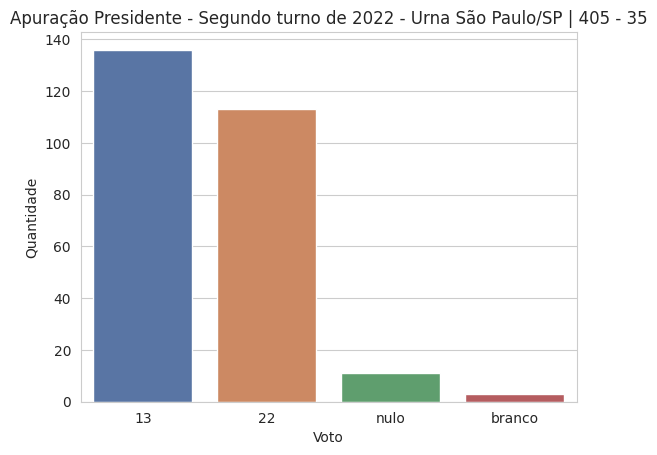

In [31]:
# criação de gráfico de barras com barplot
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column, hue=x_column, palette='deep', legend=False)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

Nesta segunda visualização, vamos observar a **quantidade de votos relativos**.

In [32]:
x_column = 'voto'
y_column = 'quantidade_pct'

In [33]:
title = f'Apuração Presidente - Segundo turno de 2022 - Urna {URNA}'
x_lable = 'Voto'
y_lable = 'Quantidade (%)'

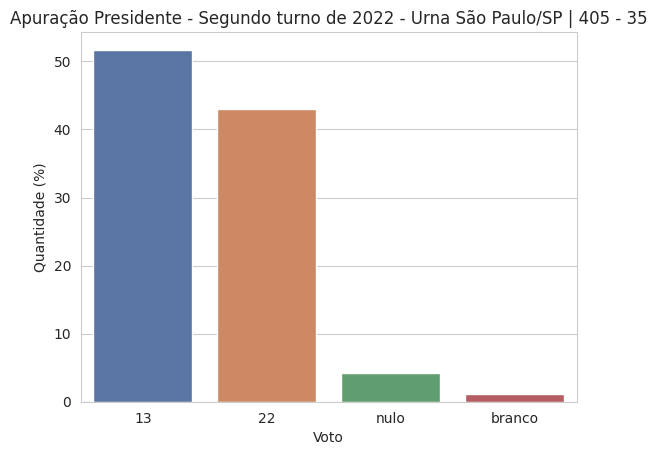

In [34]:
with sns.axes_style('whitegrid'):
  chart = sns.barplot(data=votes_table_agg, x=x_column, y=y_column, hue=x_column, palette='deep', legend=False)
  chart.set(title=title, xlabel=x_lable, ylabel=y_lable);

-- Objetivo atingido concluindo a análise de dados desde a extração dos dados brutos no site do TSE, realizando o processamento analítico, gerando visualizações dos dados agregados/transformados, reproduzindo o boletim de urna e evidenciando a consistência das informações.

## 5\. Referências

Workshop EBAC - Escola Britânica de Artes Criativas & Tecnologia